# Clase 11: Transformada de Fourier continua, ejemplos integradores

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import csv
from matplotlib.colors import Normalize
import pandas as pd

## Enventanado de señales

### Enventanado de un ECG

Text(0.5, 1.0, 'Señal cortada')

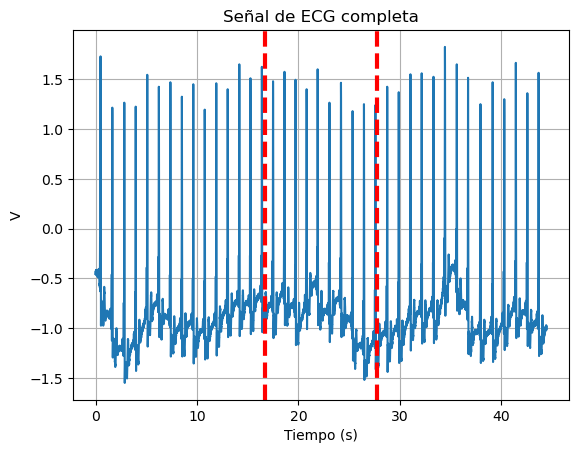

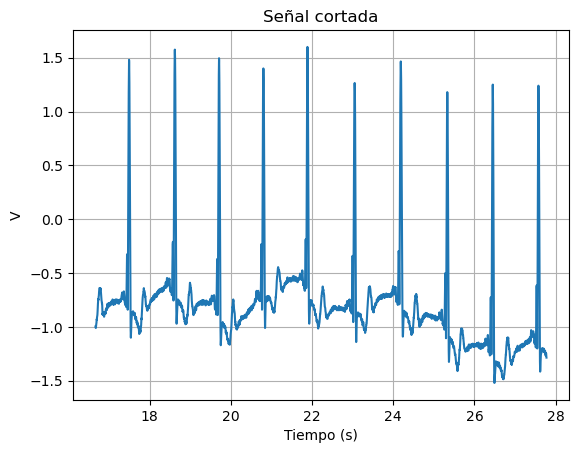

In [2]:
data = pd.read_csv('s2.csv', sep = ',', header=None)    #Sample rate: 360
data.columns = ['s2']
s2 = data['s2']
h_t = 1/360
t = np.arange(0, len(data))*h_t

s2_cort = np.array(s2[274000 : 290000])
t_cort = np.array(t[274000 : 290000])
t_cort = t_cort - np.min(t_cort)

plt.figure()
plt.plot(t_cort, s2_cort)
plt.xlabel('Tiempo (s)')
plt.ylabel('V')
plt.grid()
plt.axvline(x=t_cort[6000], color='red', linewidth=3, linestyle='--')
plt.axvline(x=t_cort[10000], color='red', linewidth=3, linestyle='--')
plt.title('Señal de ECG completa')

plt.figure()
plt.plot(t_cort[6000:10000], s2_cort[6000:10000])
plt.xlabel('Tiempo (s)')
plt.ylabel('V')
plt.grid()
plt.title('Señal cortada')

**Pregunta: ¿qué operación está involucrada en recortar la señal?**
<br>
Respuesta:

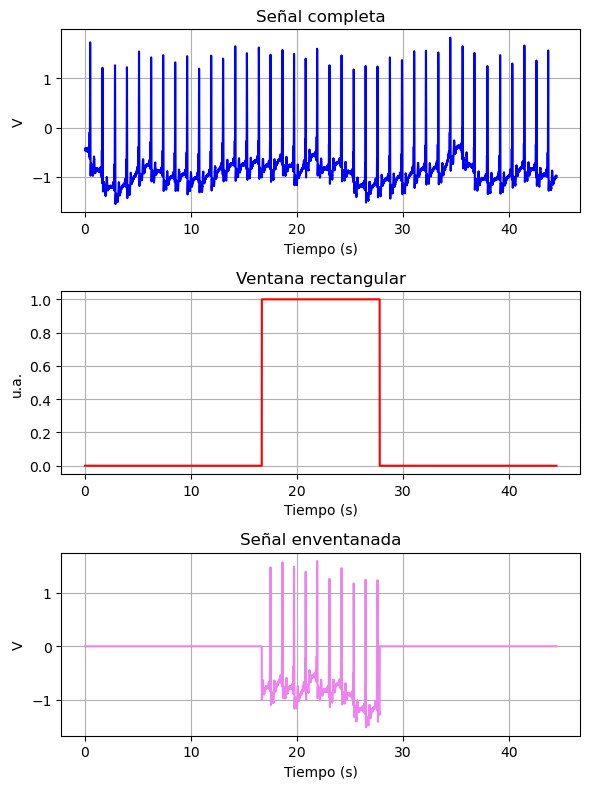

In [3]:
ventana = np.zeros(len(s2_cort))
ventana[6000:10000] = 1

s2_vent = s2_cort * ventana

# plt.figure()
# plt.plot(s2_vent)

# Crear la figura y los subgráficos
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 8))

# Subgráfico 1
axes[0].plot(t_cort, s2_cort, color = 'blue')
axes[0].set_title('Señal completa')
axes[0].set_xlabel('Tiempo (s)')
axes[0].set_ylabel('V')
axes[0].grid(True)

# Subgráfico 2
axes[1].plot(t_cort, ventana, color='red')
axes[1].set_title('Ventana rectangular')
axes[1].set_xlabel('Tiempo (s)')
axes[1].set_ylabel('u.a.')
axes[1].grid(True)

# Subgráfico 3
axes[2].plot(t_cort, s2_vent, color='violet')
axes[2].set_title('Señal enventanada')
axes[2].set_xlabel('Tiempo (s)')
axes[2].set_ylabel('V')
axes[2].grid(True)

# Ajustar el diseño y mostrar la figura
plt.tight_layout()

**Pregunta: ¿qué sucede en frecuencia cuando multiplicamos por un pulso (o ventana) en el tiempo?**
<br>
Respuesta:

### Enventanado de un seno 
El objetivo de esta parte es ver el efecto del enventanado en frecuencia.
<br>
Vamos a trabajar con una señal seno. En principio, consideremos que nuestra señal completa dura $15s$.

Text(0.5, 1.0, 'Seno con $t_{f} = 15s$: señal completa')

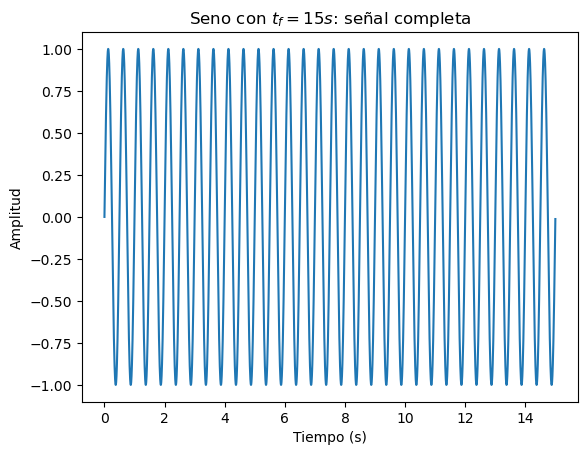

In [4]:
f = 2     # el seno tiene frecuencia 2 Hz
tf = 15   # Me defino el tiempo final del vector en 20s, el ti = 0 lo dejo fijo en 0s

h = 0.001    # Paso del vector de tiempo
t = np.arange(0, tf, h)

s_comp = np.sin(2*np.pi*f*t)

plt.figure()
plt.plot(t, s_comp)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Seno con $t_{f} = ' + str(tf) + 's$: señal completa')

Veamos el espectro en frecuencia de esta señal. Se va a usar un algoritmo computacional llamado Fast Fourier Transform (fft), que permite calcular rápidamente la Transformada de Fourier en tiempo discreto. Hasta ahora solo se ha visto la Transformada en tiempo continuo, pero esto no presenta ningún problema, ya que solo vamos a hacer un análisis cualitativo, por lo cual, usar la fft no es problema.

(-3.0, 3.0, -0.1, 1.0)

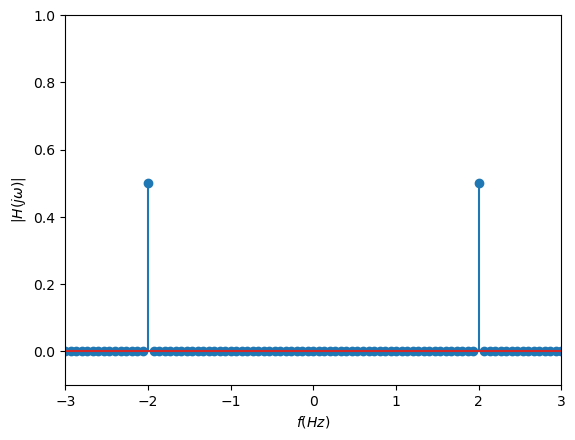

In [5]:
# Calculo de la transformada rapida de Fourier
S_comp = np.fft.fft(s_comp)/len(s_comp)   # FFT del seno, ventana rectangular, tf = 15
freq = np.fft.fftfreq(len(t), d = h)    # Notar que el eje de frecuencia depende solo de t, no de la se;al que estoy transformando

plt.figure()
plt.stem(freq, np.abs(S_comp))
plt.xlabel('$f(Hz)$')
plt.ylabel('$|H(j\omega)|$')
plt.axis([-3, 3, -0.1, 1])

Ahora vamos a aplicar distintas ventanas, y evaluar como cambia el espectro en frecuencia en consecuencia.
- Ventana rectangular.
- Hamming.
- Hann.
- Blackman.

Text(0.5, 1.0, 'Ventana rectangular')

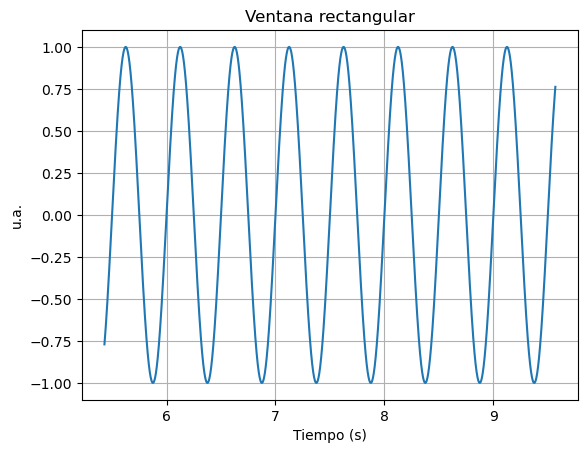

In [6]:
# Diseño de ventana rectangular. Me quiero quedar con 4.14s de la señal
tam_ventana = 4.14  # tamano de la ventana en segundos
tam_ventana_muestras = int(4.14*(1/h))  # tamano de la ventana en muestras

# Quiero que la ventana este centrada
mitad = len(t)/2
ini = mitad - tam_ventana_muestras/2  # muestra de inicio de la ventana
fin = mitad + tam_ventana_muestras/2  # muestra de fin de la ventana

ini = int(ini)
fin = int(fin)

# Señal luego de enventanado rectangular
sig_rect = s_comp[ini:fin]

# eje de tiempo para enventanar
t_env = t[ini:fin]

plt.figure()
plt.plot(t_env, sig_rect)
plt.xlabel('Tiempo (s)')
plt.ylabel('u.a.')
plt.grid()
plt.title('Ventana rectangular')

**Consigna: usando t_env (eje de tiempo de señal que quiero enventanar) y sig_rect (señal que quiero enventanar), aplicar las ventanas mencionadas anteriormente.**

In [7]:
# Ventana de Hamming
vent_ham = np.hamming(len(t_env))

# Aplicacion ventana de hamming
sig_ham = vent_ham*sig_rect

# ------QUITAR ANTES DE MANDARSELO A LOS ESTUDIANTES
# Ventana de Hamming
vent_hann = np.hanning(len(t_env))

# Aplicacion ventana de hamming
sig_hann = vent_hann*sig_rect

# Ventana de Hamming
vent_black = np.blackman(len(t_env))

# Aplicacion ventana de hamming
sig_black = vent_black*sig_rect


#----------------- COMIENZO ESPACIO PARA COMPLETAR CODIGO -------------------------------------------

# Ventana de Hann
# vent_hann = ...

# Aplicacion ventana de Hann
# sig_hann = ...

# Ventana de Blackman
# vent_black = ...

# Aplicacion ventana de Blackman
# sig_black = ...

#----------------- FIN ESPACIO PARA COMPLETAR CODIGO -------------------------------------------


Grafiquemos los resultados en tiempo y frecuencia.

Text(0.5, 1.0, 'Seno enventanado con distintas ventanas')

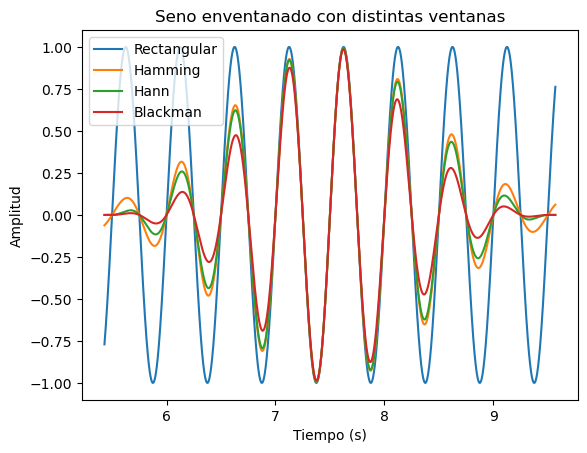

In [8]:
plt.figure()
plt.plot(t_env, sig_rect)
plt.plot(t_env, sig_ham)
plt.plot(t_env, sig_hann)
plt.plot(t_env, sig_black)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend(['Rectangular','Hamming', 'Hann', 'Blackman'])
plt.title('Seno enventanado con distintas ventanas')

**Pregunta: ordene de mayor a menor las ventanas según el grado de cambio que provoquen en la señal. ¿Si solo tuviera en cuenta lo que sucede en el tiempo, que ventana eligiría?**
<br>
Respuesta

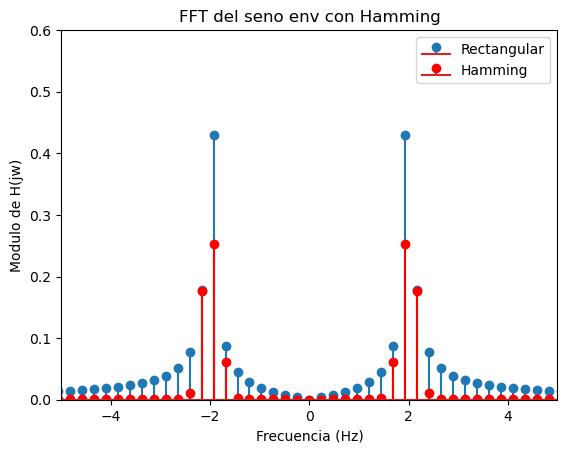

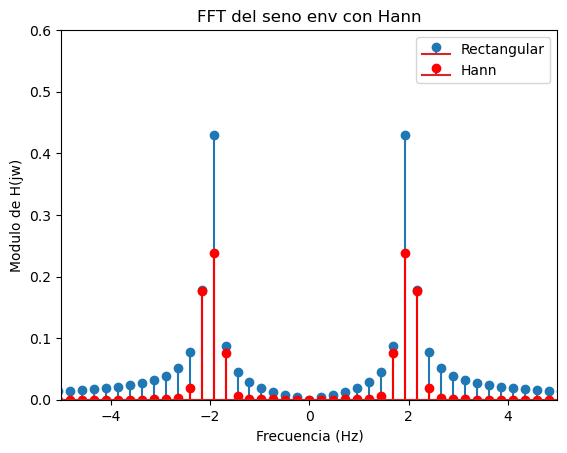

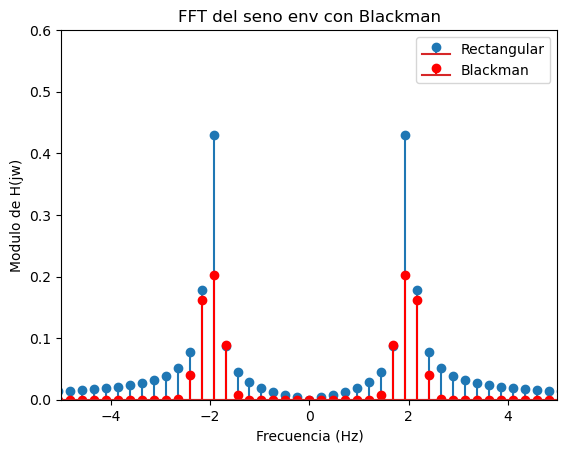

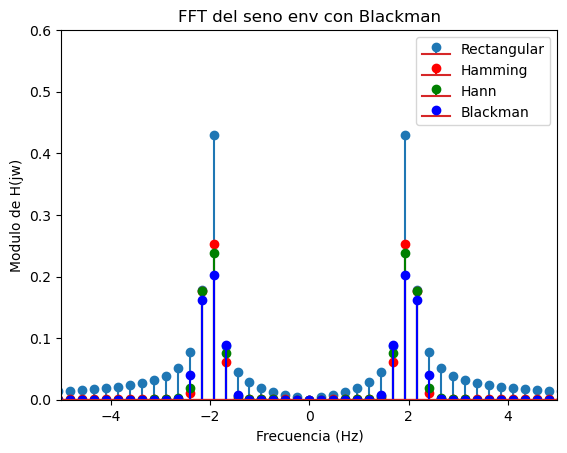

In [9]:
freq = np.fft.fftfreq(len(t_env), d = h)    # Mientras mantenga el t puedo seguir usando el mismo eje de frecuencias
S = np.fft.fft(sig_rect)/len(sig_rect)   # FFT de la se;al enventanada rectangular
S_ham = np.fft.fft(sig_ham)/len(sig_ham)   # FFT de la se;al enventanada con Hamming
S_hann = np.fft.fft(sig_hann)/len(sig_hann)   # FFT de la se;al enventanada con Hann
S_bl = np.fft.fft(sig_black)/len(sig_black)   # FFT de la se;al enventanada con blackman


plt.figure()
plt.stem(freq, np.abs(S), label = 'Rectangular')
plt.stem(freq, np.abs(S_ham), linefmt='red', markerfmt='ro', label = 'Hamming')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Modulo de H(jw)')
plt.title('FFT del seno env con Hamming')
plt.axis([-5, 5, 0, 0.6])
plt.legend()

plt.figure()
plt.stem(freq, np.abs(S), label = 'Rectangular')
plt.stem(freq, np.abs(S_hann), linefmt='red', markerfmt='ro', label = 'Hann')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Modulo de H(jw)')
plt.title('FFT del seno env con Hann')
plt.axis([-5, 5, 0, 0.6])
plt.legend()

plt.figure()
plt.stem(freq, np.abs(S), label = 'Rectangular')
plt.stem(freq, np.abs(S_bl), linefmt='red', markerfmt='ro', label = 'Blackman')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Modulo de H(jw)')
plt.title('FFT del seno env con Blackman')
plt.axis([-5, 5, 0, 0.6])
plt.legend()

plt.figure()
plt.stem(freq, np.abs(S), label = 'Rectangular')
plt.stem(freq, np.abs(S_ham), linefmt='red', markerfmt='ro', label = 'Hamming')
plt.stem(freq, np.abs(S_hann), linefmt='green', markerfmt='go', label = 'Hann')
plt.stem(freq, np.abs(S_bl), linefmt='blue', markerfmt='bo', label = 'Blackman')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Modulo de H(jw)')
plt.title('FFT del seno env con Blackman')
plt.axis([-5, 5, 0, 0.6])
plt.legend()

**Pregunta: ¿Si solo tuviera en cuenta lo que sucede en en frecuencia, qué ventana eligiría? ¿Y considerando tiempo y frecuencia?**
<br>
Respuesta

## Análisis por tramos
El objetivo de esta parte es ver rápidamente ejemplos de aplicaciones del enventanado

In [11]:
%matplotlib qt
# Mezcla de senos
''' Defino el vector de tiempo que voy a usar'''
dt = 0.0001
t = np.arange(0.0, 6.0, dt)

# fase de cada seno (sirve para análisis en tiempo y frecuencia, cap. 6)
# para el resto de los ejemplos debe ir en cero
theta1 = 0
theta2 = 0
theta3 = 0

''' Defino los senos de diferentes frecuencias que voy a usar'''
s1 = np.sin(2 * np.pi * 10 * t + theta1)
s2 = np.sin(2 * np.pi * 30 * t + theta2)
s3 = np.sin(2 * np.pi * 50 * t + theta3)

''' Defino los pulsos prendidos en diferentes tiempos que voy a usar'''
nmax = len(t)
n1 = np.int(np.floor(len(t) / 3.0))
n2 = np.int(np.ceil(len(t) * 2.0 / 3))
p1 = np.concatenate([np.ones(n1), np.zeros(n2)])
p2 = np.concatenate([np.zeros(n1), np.ones(n1), np.zeros(nmax-2*n1)])
p3 = np.concatenate([np.zeros(n2), np.ones(n1)])

''' Mezclo en un mismo eje de tiempo los tres senos
    usando los pulsos para que queden en diferentes tiempos'''
mezcla_senos = s1*p1+s2*p2+s3*p3

plt.figure()
plt.plot(t, mezcla_senos, 'r')
plt.axvline(t[int(len(t) / 3)], 0, 1)
plt.axvline(t[int(len(t) * (2/3))], 0, 1)
plt.title('Mezcla de senos')
plt.xlabel('t[s]')

C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_24580\624473775.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n1 = np.int(np.floor(len(t) / 3.0))
C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_24580\624473775.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

Text(0.5, 0, 't[s]')

**Pregunta: ¿es útil estudiar esta señal por tramos?¿Qué información puede aportar este estudio versus uno sobre todo el eje de tiempo?**
<br>
Respuesta:

In [12]:
# Visualizacion del EOG
filename='Andres.csv'
t_list = []
sig_list = []
with open(filename, 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    i=0
    for row in spamreader:
        if i>=9:
            if len(row[1])>0:
                t_list.append(float(row[0]))
                sig_list.append(float(row[1]))
        i=i+1
t=np.array(t_list)
sig=np.array(sig_list)
plt.figure()
plt.plot(t, sig)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud (V)')

**Pregunta: ¿es útil estudiar esta señal por tramos?¿Qué información puede aportar este estudio versus uno sobre todo el eje de tiempo?**
<br>
Respuesta: